<a href="https://colab.research.google.com/github/canasep/mackprojeto2/blob/main/codes/PROJETO_APLICADO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*NESTA ETAPA IREMOS CLONAR O GITHUB NO COLLAB*

In [1]:
!git clone https://github.com/canasep/mackprojeto2.git

Cloning into 'mackprojeto2'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 91 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 4.99 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (28/28), done.


**IMPORTAÇÃO DA DATABASE DO KAGGLE**

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

print("Caminho para os arquivos importados:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'amazon-products-sales-dataset-42k-items-2025' dataset.
Caminho para os arquivos importados: /kaggle/input/amazon-products-sales-dataset-42k-items-2025
['amazon_products_sales_data_cleaned.csv', 'amazon_products_sales_data_uncleaned.csv']


**CRIAÇÃO DO DATASET A PARTIR DO CSV CRÚ**

In [3]:
# IMPORTAÇÃO DO CSV E CRIAÇÃO DO DATASET

## IMPORTANDO PACOTE PANDAS
import pandas as pd

### CAMINHO PARA O ARQUIVO CRÚ
file_path = '/kaggle/input/amazon-products-sales-dataset-42k-items-2025/amazon_products_sales_data_uncleaned.csv'

### CRIAÇÃO DO DATAFRAME
try:
    df = pd.read_csv(file_path)
    print("Dataset criado com sucesso a partir do arquivo selecionado!")
except Exception as e:
    print(f"Erro ao criar o dataset: {e}")

Dataset criado com sucesso a partir do arquivo selecionado!


**IMPRESSÃO DO HEAD DO DATASET DF**

In [4]:
# IMPRESSÃO DO HEAD DO DATASET DF

df.head()


,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [ ]:
df.shape

(42675, 16)

In [5]:
import pandas as pd
import numpy as np

df = df.drop(columns=["product_url", "image_url", "delivery_details", "price_on_variant"])
print("Colunas Limpas")

Colunas Limpas


In [6]:
df["bought_in_last_month"] = df["bought_in_last_month"].str.replace(r"\+.*", "", regex=True)
df["bought_in_last_month"] = df["bought_in_last_month"].str.replace(r"K", "000", regex=True)
df["bought_in_last_month"] = pd.to_numeric(
    df["bought_in_last_month"].str.split("+").str[0],
    errors="coerce"
)
print("Tratamento da quantidade de vendas no último mês realizada")

Tratamento da quantidade de vendas no último mês realizada


In [7]:
df["rating"] = df["rating"].str[:3]
df["rating"] = pd.to_numeric(
    df["rating"].str.split("+").str[0],
    errors="coerce"
)
print("Tratamento do rating feito, o rating está de 0 a 5")

Tratamento do rating feito, o rating está de 0 a 5


In [8]:
df["listed_price_value"] = (
    df["listed_price"]
    .str.replace("$", "", regex=False)
    .str.replace(" ", "", regex=False)
    .replace("NoDiscount", "0")
)
df["listed_price_value"] = pd.to_numeric(df["listed_price_value"], errors="coerce").fillna(0)
df = df.drop(columns=["listed_price"])
print("A coluna listed price value foi tratada em uma coluna que apresenta os valores presentes")

A coluna listed price value foi tratada em uma coluna que apresenta os valores presentes


In [9]:
s = df["is_couponed"].fillna("")
pct_raw = s.str.extract(r'(\d+(?:\.\d+)?)\s*%', expand=False)
val_raw = s.str.extract(r'\$\s*([0-9]+(?:\.[0-9]+)?)', expand=False)
df["coupon_discount_percentage"] = np.where(
    pct_raw.notna(), pd.to_numeric(pct_raw, errors="coerce") / 100.0, 0.0
)
df["coupon_discount_value"] = np.where(
    val_raw.notna(), pd.to_numeric(val_raw, errors="coerce"), 0.0
)
mask_no = s.str.contains("No Coupon", case=False, na=False)
df.loc[mask_no, ["coupon_discount_percentage", "coupon_discount_value"]] = 0.0
df = df.drop(columns=["is_couponed"])
print("Tratamento da coluna is_couponed foi divida em duas colunas, a que oferece desconto em porcentagem e a que oferece desconto em valores absolutos")


Tratamento da coluna is_couponed foi divida em duas colunas, a que oferece desconto em porcentagem e a que oferece desconto em valores absolutos


In [10]:
patterns = {
    "energy_efficiency": r"\bEnergy efficiency\b",
    "work_with_alexa": r"(Works with Alexa|Alexa Built[- ]?in)",
    "small_business": r"\bSmall Business\b",
    "carbon_impact": r"\bCarbon impact\b",
}

s = df["sustainability_badges"].fillna("")

for col, rx in patterns.items():
    if col.lower() != "made_in_italy":  # garante que nunca criamos essa coluna
        df[col] = s.str.contains(rx, case=False, na=False).astype(int)

df = df.drop(columns=["sustainability_badges"])
print("Tratamento da coluna de badges feita, agora há colunas binárias")

Tratamento da coluna de badges feita, agora há colunas binárias


/tmp/ipython-input-3371970532.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[col] = s.str.contains(rx, case=False, na=False).astype(int)


In [11]:
df = df.rename(columns={"buy_box_availability": "add_to_cart_available"})

df["add_to_cart_available"] = (
    df["add_to_cart_available"]
    .fillna("")                                 # substitui NaN por string vazia
    .str.contains("Add to cart", case=False)    # checa se contém "Add to cart"
    .astype(int)                                # transforma True/False em 1/0
)
print("Coluna de buy_box_availability só havia uma informação - add to cart - ou - NaaN, então ela foi renomeada para add_to_cart_available e agora é binária, 1 ou 0")

Coluna de buy_box_availability só havia uma informação - add to cart - ou - NaaN, então ela foi renomeada para add_to_cart_available e agora é binária, 1 ou 0


In [12]:
df["is_sponsored"] = np.where(df["is_sponsored"] == "Sponsored", 1, 0)
print("A coluna is_sponsored tinha uma string para se era patrocinado ou não, foi tratado, agora é binário com 1 para sponsored e 0 para não")

A coluna is_sponsored tinha uma string para se era patrocinado ou não, foi tratado, agora é binário com 1 para sponsored e 0 para não


In [13]:
df["collected_at"] = pd.to_datetime(df["collected_at"], errors="coerce")
df["collected_at"] = df["collected_at"].dt.month
print("Mantido só o mês que é a informação crucial da data da coleta, o ano é só 2025")

Mantido só o mês que é a informação crucial da data da coleta, o ano é só 2025


In [14]:

df["best_seller"] = df["is_best_seller"].str.contains("Best Seller", case=False, na=False).astype(int)

df["amazon_choice"] = df["is_best_seller"].str.contains("Amazon", case=False, na=False).astype(int)

df["best_seller_discount"] = (
    df["is_best_seller"]
    .str.extract(r"Save\s*(\d+)%", expand=False)   # pega o número depois de "Save"
    .fillna(0)
    .astype(int)
    / 100.0                                        # normaliza entre 0 e 1
)
df = df.drop(columns=["is_best_seller"])
print("Coluna de selo Amazon tratada, criada 2 colunas binárias se é best_seller e se é amazon_choice, e se há desconto do vendedor ativo com o valor do desconto em float")

Coluna de selo Amazon tratada, criada 2 colunas binárias se é best_seller e se é amazon_choice, e se há desconto do vendedor ativo com o valor do desconto em float


In [15]:
df["current/discounted_price"] = (df["current/discounted_price"].fillna(0))

col = "current/discounted_price"

df[col] = (
    df[col]
    .astype(str)
    .str.strip()
    .str.replace(r"[^\d\.\-]", "", regex=True)
    .replace({"": None})
    .pipe(pd.to_numeric, errors="coerce")
    .fillna(0)
)

df["current/discounted_price"] = pd.to_numeric(df["current/discounted_price"])

print("Descontos limpos e passados para número")
df.head()

Descontos limpos e passados para número


,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,is_sponsored,add_to_cart_available,collected_at,listed_price_value,coupon_discount_percentage,coupon_discount_value,energy_efficiency,work_with_alexa,small_business,carbon_impact,best_seller,amazon_choice,best_seller_discount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300.0,89.68,1,1,8,159.00,0.15,0.0,0,0,0,1,0,0,0.0
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,"2,457",6000.0,9.99,1,1,8,15.99,0.00,0.0,0,0,0,0,0,0,0.0
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,"3,044",2000.0,314.00,1,1,8,349.00,0.00,0.0,0,0,0,0,0,0,0.0
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,"35,882",10000.0,0.00,0,0,8,0.00,0.00,0.0,0,0,0,0,1,0,0.0
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,"28,988",10000.0,0.00,0,0,8,0.00,0.00,0.0,0,0,0,0,0,0,0.0


In [16]:
df["marca"] = df["title"].str.split().str[0]
df["title"] = df["title"].str.split(n=1).str[1]

In [17]:
marca_counts = df["marca"].value_counts()

c = 1
for i in range(1,8):
    c += 50
    print("Quantidade de Vendas até ", c-1)
    print("Total de marcas: ", (marca_counts < c).sum())
    print(".....................................")

Quantidade de Vendas até  50
Total de marcas:  577
.....................................
Quantidade de Vendas até  100
Total de marcas:  622
.....................................
Quantidade de Vendas até  150
Total de marcas:  654
.....................................
Quantidade de Vendas até  200
Total de marcas:  679
.....................................
Quantidade de Vendas até  250
Total de marcas:  694
.....................................
Quantidade de Vendas até  300
Total de marcas:  705
.....................................
Quantidade de Vendas até  350
Total de marcas:  714
.....................................


In [19]:
lista_marcas = df["marca"].unique().tolist()
print("A lista de marcas:")
print(lista_marcas)

A lista de marcas:
['BOYA', 'LISEN', 'DJI', 'Apple', 'Texas', 'Complete', 'Amazon', 'Transformers', 'Seagate', 'Peak', 'Roku', 'Energizer', 'Duracell', 'Sony', 'HP', 'Razer', 'OWC', 'Mounting', 'Scotch', 'JBL', 'TP-Link', 'Samsung', 'Sharpie', 'SanDisk', 'Beats', 'AMD', 'KODAK', 'PHILIPS', 'Sanus', 'VIZIO', 'Aquaphor', 'Logitech', 'Meta', 'Original', 'Anker', 'Escort', 'Fitbit', 'RCA', 'Pyle', 'myQ', 'Sceptre', 'Canon', 'Epson', 'Fujifilm', 'Post-it', 'Avery', 'Soundcore', 'DEWALT', 'Monster', 'APC', 'Xbox', 'SAMSUNG', 'BIC', 'Fila', 'TRANSFORMERS', 'Philips', 'acer', 'Nintendo', 'EPSON', 'Brother', 'CyberPower', 'Powermax', 'Baseus', 'Dell', 'ASUS', 'DYMO', 'Acer', 'Bose', 'Lasko', 'Crucial', 'Garmin', 'Listerine', '3M', 'Skullcandy', 'CORSAIR', 'NETGEAR', 'Pendaflex', 'iOttie', 'Lexar', 'WD_BLACK', 'Kasa', 'Skylight', 'Hisense', 'Turtle', 'Belkin', 'Chuckit!', 'MSI', 'Kleenex', 'Ubiquiti', 'AT&T', 'Ring', 'Legrand', 'Power', 'WYZE', 'Mophie', 'UGREEN', 'Braun', 'Sonos', 'Tile', 'ARRI

In [21]:
brands_map = {
    "Apple": "Consumer Electronics & Technology",
    "Samsung": "Consumer Electronics & Technology",
    "LG": "Consumer Electronics & Technology",
    "Sony": "Consumer Electronics & Technology",
    "Panasonic": "Consumer Electronics & Technology",
    "Philips": "Consumer Electronics & Technology",
    "Sharp": "Consumer Electronics & Technology",
    "Hisense": "Consumer Electronics & Technology",
    "Vizio": "Consumer Electronics & Technology",
    "TCL": "Consumer Electronics & Technology",
    "Acer": "Consumer Electronics & Technology",
    "ASUS": "Consumer Electronics & Technology",
    "Dell": "Consumer Electronics & Technology",
    "Lenovo": "Consumer Electronics & Technology",
    "Microsoft": "Consumer Electronics & Technology",
    "Google": "Consumer Electronics & Technology",
    "Meta": "Consumer Electronics & Technology",
    "Amazon": "Consumer Electronics & Technology",
    "Nintendo": "Consumer Electronics & Technology",
    "Xbox": "Consumer Electronics & Technology",
    "PlayStation": "Consumer Electronics & Technology",
    "Roku": "Consumer Electronics & Technology",
    "Canon": "Consumer Electronics & Technology",
    "Epson": "Consumer Electronics & Technology",
    "Fujifilm": "Consumer Electronics & Technology",
    "Nikon": "Consumer Electronics & Technology",
    "GoPro": "Consumer Electronics & Technology",
    "Insta360": "Consumer Electronics & Technology",
    "DJI": "Consumer Electronics & Technology",

    "JBL": "Audio, Music & Headphones",
    "Beats": "Audio, Music & Headphones",
    "Bose": "Audio, Music & Headphones",
    "Razer": "Audio, Music & Headphones",
    "Corsair": "Audio, Music & Headphones",
    "SteelSeries": "Audio, Music & Headphones",
    "HyperX": "Audio, Music & Headphones",
    "Audio-Technica": "Audio, Music & Headphones",
    "Shure": "Audio, Music & Headphones",
    "Sennheiser": "Audio, Music & Headphones",
    "AKG": "Audio, Music & Headphones",
    "Skullcandy": "Audio, Music & Headphones",
    "Sonos": "Audio, Music & Headphones",
    "Soundcore": "Audio, Music & Headphones",
    "Marshall": "Audio, Music & Headphones",
    "Rode": "Audio, Music & Headphones",
    "Jabra": "Audio, Music & Headphones",
    "Logitech (G and audio)": "Audio, Music & Headphones",
    "Plantronics": "Audio, Music & Headphones",
    "beyerdynamic": "Audio, Music & Headphones",

    "Seagate": "Storage & Components",
    "Western": "Storage & Components",
    "WD": "Storage & Components",
    "WD_BLACK": "Storage & Components",
    "Crucial": "Storage & Components",
    "Kingston": "Storage & Components",
    "SanDisk": "Storage & Components",
    "Lexar": "Storage & Components",
    "PNY": "Storage & Components",
    "Intel": "Storage & Components",
    "AMD": "Storage & Components",
    "NVIDIA": "Storage & Components",
    "GIGABYTE": "Storage & Components",
    "ASRock": "Storage & Components",
    "MSI": "Storage & Components",
    "EVGA": "Storage & Components",
    "ZOTAC": "Storage & Components",
    "XPG": "Storage & Components",
    "Sabrent": "Storage & Components",

    "Duracell": "Energy & Batteries",
    "Energizer": "Energy & Batteries",
    "Rayovac": "Energy & Batteries",
    "Anker": "Energy & Batteries",
    "Mophie": "Energy & Batteries",
    "CyberPower": "Energy & Batteries",
    "APC": "Energy & Batteries",
    "Eaton": "Energy & Batteries",
    "Tripp": "Energy & Batteries",
    "Powermax": "Energy & Batteries",
    "Renogy": "Energy & Batteries",
    "NOCO": "Energy & Batteries",
    "Seasonic": "Energy & Batteries",

    "TP-Link": "Peripherals & Accessories",
    "NETGEAR": "Peripherals & Accessories",
    "Linksys": "Peripherals & Accessories",
    "Ubiquiti": "Peripherals & Accessories",
    "ARRIS": "Peripherals & Accessories",
    "Ring": "Peripherals & Accessories",
    "Wyze": "Peripherals & Accessories",
    "Arlo": "Peripherals & Accessories",
    "Kasa": "Peripherals & Accessories",
    "Tapo": "Peripherals & Accessories",
    "iOttie": "Peripherals & Accessories",
    "OtterBox": "Peripherals & Accessories",
    "Spigen": "Peripherals & Accessories",
    "Belkin": "Peripherals & Accessories",
    "Baseus": "Peripherals & Accessories",
    "UGREEN": "Peripherals & Accessories",
    "Satechi": "Peripherals & Accessories",
    "Elgato": "Peripherals & Accessories",
    "PopSockets": "Peripherals & Accessories",

    "3M": "Home & Office",
    "Scotch": "Home & Office",
    "Post-it": "Home & Office",
    "Avery": "Home & Office",
    "Pendaflex": "Home & Office",
    "Fellowes": "Home & Office",
    "Swingline": "Home & Office",
    "Staples": "Home & Office",
    "Brother": "Home & Office",
    "DYMO": "Home & Office",
    "Sharpie": "Home & Office",
    "Crayola": "Home & Office",
    "Staedtler": "Home & Office",
    "Pentel": "Home & Office",

    "DEWALT": "Tools & Construction",
    "Black+Decker": "Tools & Construction",
    "Bosch": "Tools & Construction",
    "Stanley": "Tools & Construction",
    "Makita": "Tools & Construction",
    "Milwaukee": "Tools & Construction",
    "Dremel": "Tools & Construction",
    "Klein": "Tools & Construction",
    "Legrand": "Tools & Construction",
    "Schlage": "Tools & Construction",
    "Honeywell": "Tools & Construction",

    "Fila": "Fashion & Lifestyle",
    "adidas": "Fashion & Lifestyle",
    "Nike": "Fashion & Lifestyle",
    "Puma": "Fashion & Lifestyle",
    "Ray-Ban": "Fashion & Lifestyle",
    "Oakley": "Fashion & Lifestyle",
    "SwissGear": "Fashion & Lifestyle",
    "JanSport": "Fashion & Lifestyle",
    "Carhartt": "Fashion & Lifestyle",
    "Wrangler": "Fashion & Lifestyle",

    "Listerine": "Health, Hygiene & Personal Care",
    "Aquaphor": "Health, Hygiene & Personal Care",
    "Kleenex": "Health, Hygiene & Personal Care",
    "Purell": "Health, Hygiene & Personal Care",
    "Braun": "Health, Hygiene & Personal Care",
    "Oral-B": "Health, Hygiene & Personal Care",
    "Dove": "Health, Hygiene & Personal Care",
    "Gojo": "Health, Hygiene & Personal Care",
    "Philips (personal care)": "Health, Hygiene & Personal Care",
    "Remington": "Health, Hygiene & Personal Care",

    "Hasbro": "Other / Entertainment & Toys",
    "Transformers": "Other / Entertainment & Toys",
    "Pokemon": "Other / Entertainment & Toys",
    "Lego": "Other / Entertainment & Toys",
    "Ubisoft": "Other / Entertainment & Toys",
    "Victrola": "Other / Entertainment & Toys",
    "Fender": "Other / Entertainment & Toys",
    "Casio": "Other / Entertainment & Toys",
    "Yamaha": "Other / Entertainment & Toys",
    "Roland": "Other / Entertainment & Toys"
}

df["brand_group"] = df["marca"].map(brands_map).fillna("Other")

In [22]:
cols = ["marca", "brand_group", "title"] + [col for col in df.columns if col not in ["marca", "brand_group", "title"]]
df = df[cols]
print("Reorganizar Colunas")

df[["title", "title_complement"]] = df["title"].str.split(",", n=1, expand=True)
df["title"] = df["title"].str.strip()
df["title_complement"] = df["title_complement"].str.strip()
print("Title dividida em title e title_complement")


Reorganizar Colunas
Title dividida em title e title_complement


In [23]:
df_consumer_electronics = df[df["brand_group"] == "Consumer Electronics & Technology"]
df_audio_music          = df[df["brand_group"] == "Audio, Music & Headphones"]
df_storage              = df[df["brand_group"] == "Storage & Components"]
df_energy               = df[df["brand_group"] == "Energy & Batteries"]
df_peripherals          = df[df["brand_group"] == "Peripherals & Accessories"]
df_home_office          = df[df["brand_group"] == "Home & Office"]
df_tools                = df[df["brand_group"] == "Tools & Construction"]
df_fashion              = df[df["brand_group"] == "Fashion & Lifestyle"]
df_health               = df[df["brand_group"] == "Health, Hygiene & Personal Care"]
df_entertainment        = df[df["brand_group"] == "Other / Entertainment & Toys"]
df_other                = df[df["brand_group"] == "Other"]

Eletronicos, Audio, Armazenamento, Energia, Periférico, Home Office, Ferramentas, Moda, Saúde, Entretenimento ou Outros? eletronicos
Qual a marca? apple

Mais vendidos da marca: apple
...........................................


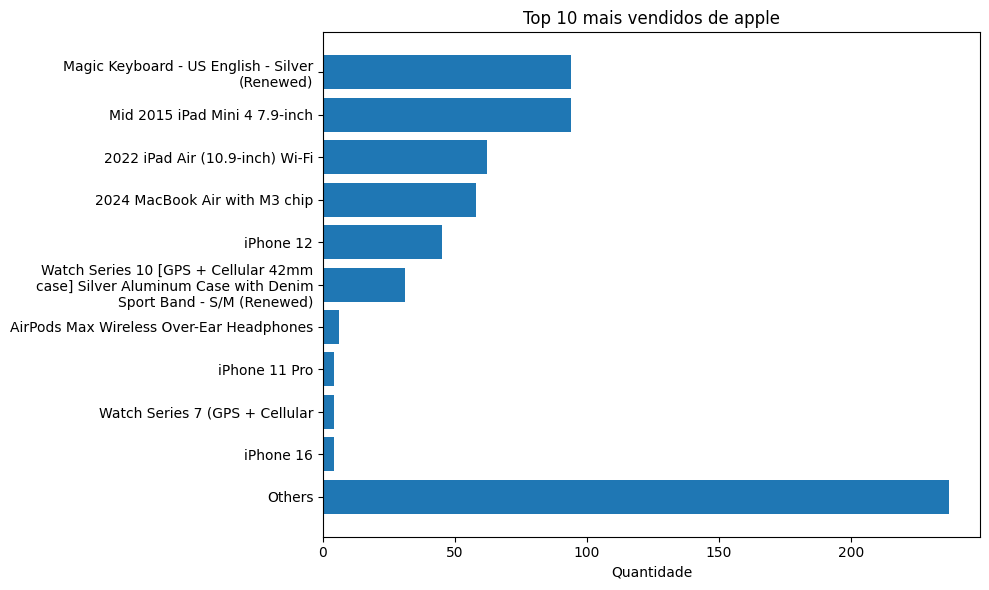

In [24]:
import unicodedata, re, textwrap
import matplotlib.pyplot as plt

# ---------- normalizadores ----------
def strip_accents_lower(s: str) -> str:
    s = unicodedata.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not unicodedata.combining(ch))
    return s.casefold()

def norm_key(s: str) -> str:
    s = strip_accents_lower(s)
    s = re.sub(r'[\s-]+', '', s)
    return s

# ---------- mapeamento de opções -> DataFrames ----------
options_map = {
    norm_key("Eletrônicos"): df_consumer_electronics,
    norm_key("Audio"): df_audio_music,
    norm_key("Armazenamento"): df_storage,
    norm_key("Energia"): df_energy,
    norm_key("Periférico"): df_peripherals,
    norm_key("Home Office"): df_home_office,
    norm_key("Ferramentas"): df_tools,
    norm_key("Moda"): df_fashion,
    norm_key("Saúde"): df_health,
    norm_key("Entretenimento"): df_entertainment,
    norm_key("Outros"): df_other,
}

# ---------- entrada do usuário ----------
dfs_choose = input("Eletronicos, Audio, Armazenamento, Energia, Periférico, Home Office, Ferramentas, Moda, Saúde, Entretenimento ou Outros? ")
DF = options_map.get(norm_key(dfs_choose))
if DF is None:
    print("Opção inválida.")
else:
    marca = input("Qual a marca? ").strip()
    marca_norm = strip_accents_lower(marca)

    df_analytics = DF[DF["marca"].astype(str).apply(strip_accents_lower) == marca_norm]
    if df_analytics.empty:
        print("Nenhum registro para essa marca nessa categoria.")
    else:
        # ---------- contagem de títulos ----------
        counts = df_analytics["title"].value_counts()

        # Top 10 + Others
        TOP_N = 10
        n = min(TOP_N, len(counts))
        top = counts.head(n)
        others_sum = counts.iloc[n:].sum() if len(counts) > n else 0

        plot_labels = top.index.tolist()
        plot_values = top.values.tolist()
        if others_sum > 0:
            plot_labels.append("Others")
            plot_values.append(others_sum)

        # ---------- impressão da tabela ----------
        print("\nMais vendidos da marca:", marca)
        print("...........................................")
        tabela = top.rename_axis("title").reset_index(name="count")
        if others_sum > 0:
            tabela = tabela._append({"title": "Others", "count": others_sum}, ignore_index=True)

        # ---------- gráfico (matplotlib) ----------
        # (sem definir cores/estilos; barras horizontais para caber títulos longos)
        # wrap dos títulos para não estourar a largura
        wrapped_labels = [textwrap.fill(str(t), width=40) for t in plot_labels]

        plt.figure(figsize=(10, 6))
        plt.barh(wrapped_labels, plot_values)
        plt.xlabel("Quantidade")
        plt.title(f"Top {n} mais vendidos de {marca}")
        plt.gca().invert_yaxis()  # top primeiro
        plt.tight_layout()
        plt.show()
